In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv('ipca.csv', sep=';', decimal=',', index_col='YearMo')
categories = pd.read_csv('categories.csv', index_col='CodItem')

items = list(map(lambda x: x+'_acc', "7169,7170,7445,7486,7558,7625,7660,7712,7766,7786".split(",")))
# items = list(map(lambda x: x+'_real', "7169,7170,7445,7486,7558,7625,7660,7712,7766,7786".split(",")))
# items = list(map(lambda x: x+'_acc', "7172,7184,7200,7219,7241,7254,7283,7303,7335,7349,7356,7372,7384,7389,7401,7415".split(",")))
# data = data.filter(like='_real')

# if sys.argv[2]:
data = data[items]


data = data[data.index > int(200301)] 
data['YearMo'] = data.index
names = {}

data
# data.to_csv('results.csv', sep=';', float_format='%.3f', decimal=',', encoding='iso-8859-1', index=False )

C:\Users\d816834\AppData\Local\Temp\ipykernel_25872\1286148234.py:1: DtypeWarning: Columns (78,131,138,147,675,678,703,729,731,732,733) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('ipca.csv', sep=';', decimal=',', index_col='YearMo')


,7169_acc,7170_acc,7445_acc,7486_acc,7558_acc,7625_acc,7660_acc,7712_acc,7766_acc,7786_acc,YearMo
YearMo,,,,,,,,,,,
200302,1.382,1.469,1.342,1.320,1.232,1.541,1.233,1.260,1.318,1.394,200302
200303,1.399,1.493,1.356,1.336,1.240,1.552,1.263,1.269,1.330,1.416,200303
200304,1.413,1.508,1.383,1.347,1.252,1.560,1.282,1.273,1.336,1.418,200304
200305,1.422,1.518,1.414,1.351,1.267,1.555,1.291,1.275,1.339,1.419,200305
200306,1.419,1.512,1.421,1.350,1.291,1.532,1.296,1.278,1.341,1.421,200306
...,...,...,...,...,...,...,...,...,...,...,...
202201,4.015,5.210,4.435,2.331,3.286,3.752,3.768,4.364,4.189,2.325,202201
202202,4.056,5.277,4.459,2.373,3.315,3.769,3.785,4.392,4.424,2.331,202202
202203,4.121,5.404,4.510,2.386,3.375,3.883,3.819,4.418,4.430,2.330,202203


In [43]:
for column in data.columns:
    if column != 'YearMo':
        first_value = float(data[column][data[column].first_valid_index()])
        names[column] = categories.loc[int(column.partition("_")[0])]['DescItem']
        data[column] = data.apply(lambda row : (row[column]/first_value-1)*100, axis=1)

data = data.rename(columns=names)
data['YearMo'] = data.apply(lambda row : pd.to_datetime(str(row['YearMo'])[:4]+'-'+str(row['YearMo'])[4:6]), axis=1)
data.index = data['YearMo']
data = data.drop(columns=['YearMo'])

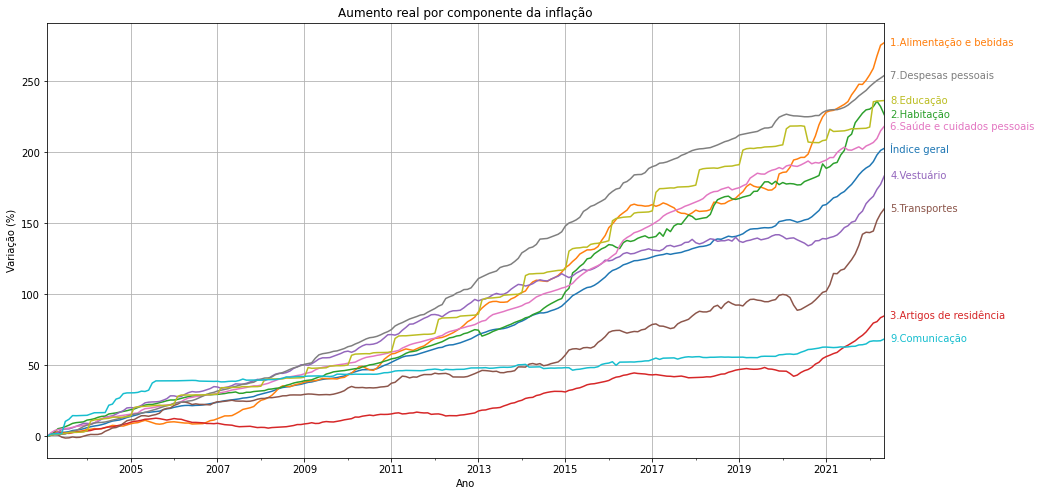

In [44]:
ax = data.plot(figsize=(15,8), grid=True, xlabel="Ano", ylabel="Variação (%)", title="Aumento real por componente da inflação")
for line, name in zip(ax.lines, data.columns):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1, y), xytext=(6, 0),
                color=line.get_color(), xycoords=ax.get_yaxis_transform(),
                textcoords="offset points", size=10, va="center")
ax.get_legend().remove()
plt.savefig('results.png')

In [45]:
last_row = data.iloc[-1].sort_values(ascending=True)
last_row.head(10)

9.Comunicação                   68.507891
3.Artigos de residência         84.772727
5.Transportes                  160.220636
4.Vestuário                    183.279221
Índice geral                   202.821997
6.Saúde e cuidados pessoais    218.329278
2.Habitação                    226.602086
8.Educação                     236.494689
7.Despesas pessoais            254.126984
1.Alimentação e bebidas        277.263445
Name: 2022-05-01 00:00:00, dtype: float64